In [334]:
# NumPy for numeriske operasjoner
import numpy as np                   

# Pandas for datahåndtering og -analyse
import pandas as pd                  

# Matplotlib for plotting av grafer
import matplotlib.pyplot as plt      

# Seaborn for forbedret data visualisering
import seaborn as sb                 

# Scikit-learn for maskinlæring og evaluering av modeller
from sklearn import metrics          

# Scikit-learn for data preprosessering
from sklearn import preprocessing    

# Importerer lineær regresjonsmodell
from sklearn.linear_model import LinearRegression  

# Importerer funksjonen for å dele datasett i trenings- og testsett
from sklearn.model_selection import train_test_split  


Import csv

In [335]:

# Leser inn data fra en CSV-fil ved å bruke Pandas
df = pd.read_csv(url)

# Viser innholdet av DataFrame
display(df)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
3351,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000


In [336]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [337]:
# Konverterer kolonnen 'Date' til datatypen datetime ved hjelp av Pandas
df['Date'] = pd.to_datetime(df['Date'])

In [338]:
# Gir informasjon om DataFrame, inkludert datatyper og manglende verdier
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3353 non-null   datetime64[ns]
 1   Open       3353 non-null   float64       
 2   High       3353 non-null   float64       
 3   Low        3353 non-null   float64       
 4   Close      3353 non-null   float64       
 5   Adj Close  3353 non-null   float64       
 6   Volume     3353 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.5 KB


In [339]:
df[df['Close'] == df['Adj Close']].shape

(3353, 7)

In [340]:
df = df.drop(['Adj Close'], axis=1)

In [341]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<Axes: xlabel='Date', ylabel='Close'>

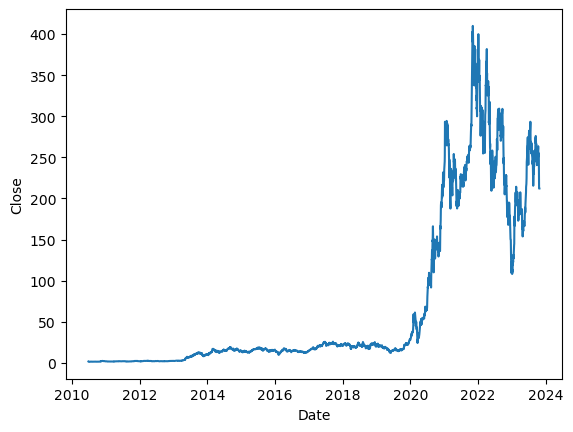

In [342]:
sb.lineplot(data = df, x = 'Date', y = 'Close')

<Axes: >

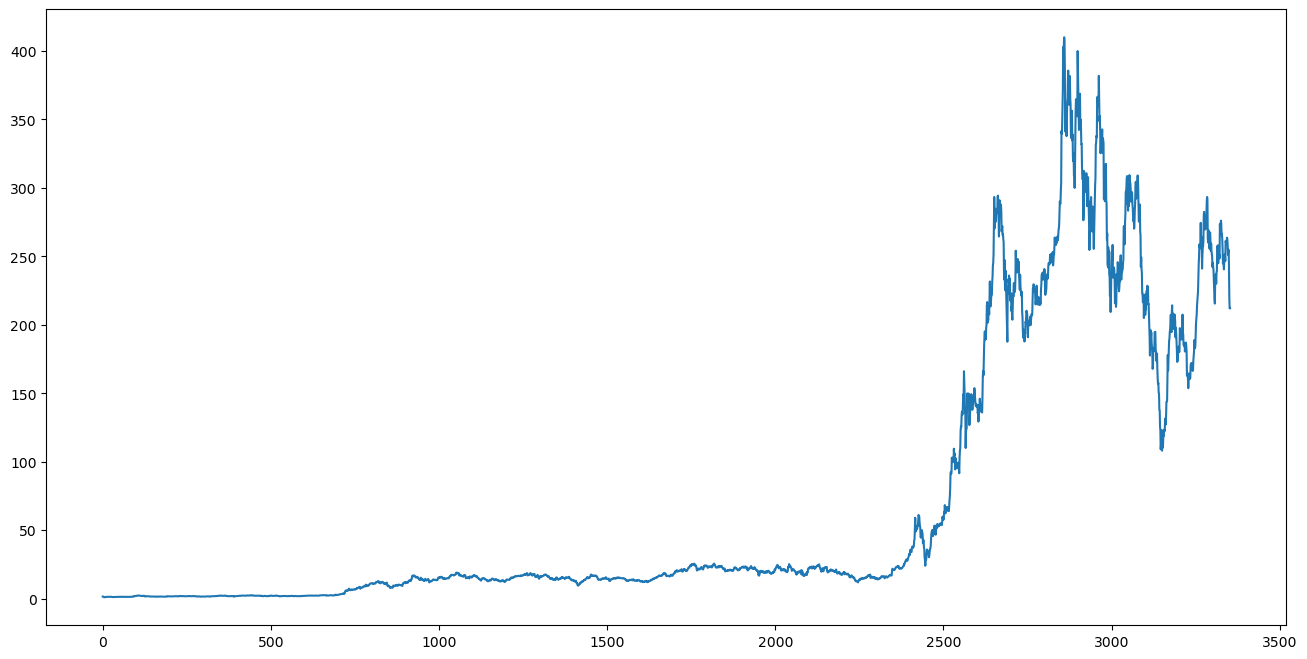

In [343]:
df['Close'].plot(figsize=(16,8))

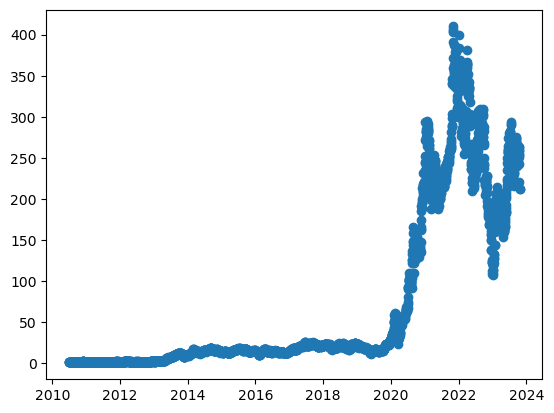

In [344]:
plt.scatter(data = df, x = 'Date', y = 'Close')

In [345]:
# Assuming 'Date' column is already in datetime format
df['Number of Days'] = (df['Date'] - df['Date'].min()).dt.days
df.head()


,Date,Open,High,Low,Close,Volume,Number of Days
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,1
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,2
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,3
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,7


In [346]:
# Definerer funksjonsverdier (x) og måleverdier (y) fra DataFrame
x = df[['Number of Days']].values.reshape(-1, 1)
y = df['Close'].values.reshape(-1, 1)


In [347]:
# Deler datasettet inn i trenings- og testsett
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [348]:
# Oppretter og trener en lineær regresjonsmodell med treningsdata
linear_regressor = LinearRegression().fit(x_train, y_train)

In [349]:
# Predikerer 'Close'-verdiene på testsettet ved hjelp av lineær regresjon
y_lin_prediction = linear_regressor.predict(x_test)

# Beregner og evaluerer ytelsen til lineær regresjonsmodellen
linear_regressor_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_lin_prediction))
linear_regressor_r2 = metrics.r2_score(y_test, y_lin_prediction)

# Skriver ut resultater
print(f"RMSE = {linear_regressor_rmse.round(2)}")
print(f"R2 = {linear_regressor_r2.round(2)}")


RMSE = 63.24
R2 = 0.58


Text(0.5, 1.0, 'Comparison')

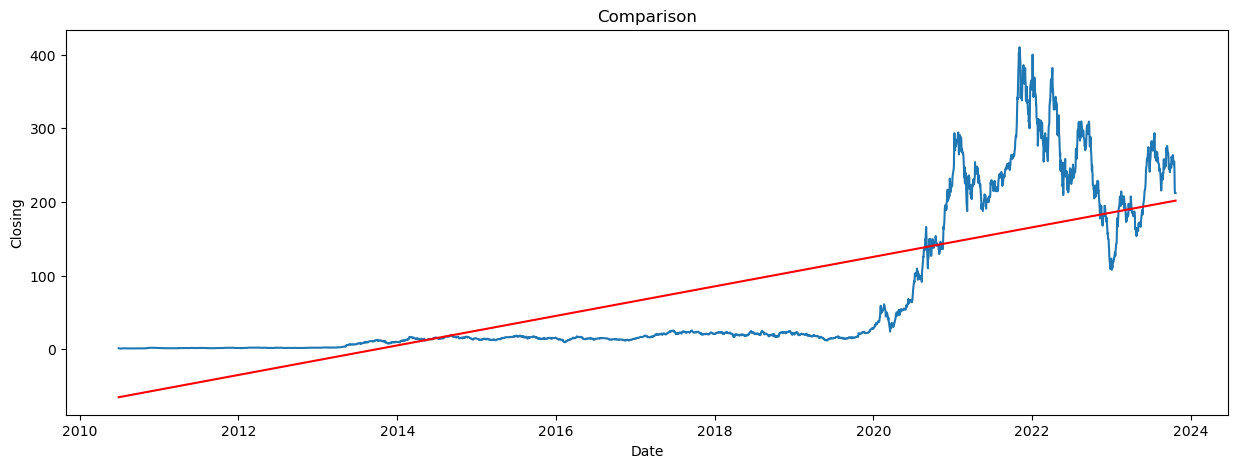

In [350]:
# Utfører lineær regresjon for å predikere 'Close'-verdiene
y_lin_pred = linear_regressor.predict(x)

# Plotter sammenligning mellom faktiske og predikerte verdier
plt.figure(figsize=(15, 5))
plt.plot(df.Date, df.Close, label='Actual')
plt.plot(df.Date, y_lin_pred, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing')
plt.title('Comparison')
plt.legend()

